## Naive Bayes Classifier


* Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.

* Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

### Naive Bayes Classification on MNIST dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
%pylab inline
# Fetch the MNIST handwritten digit dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="data")

Populating the interactive namespace from numpy and matplotlib


/Users/ramakrishnavempati/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/ramakrishnavempati/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Display the number of samples 
mnist.data.shape

(70000, 784)

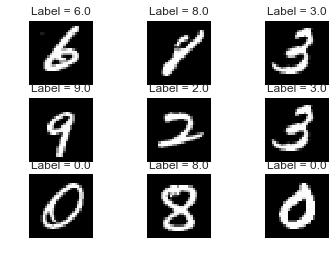

In [4]:
# Display 9 number randomly selectly
for c in range(1, 10):
    subplot(3, 3,c)
    i = randint(mnist.data.shape[0])
    im = mnist.data[i].reshape((28,28))
    axis("off")
    title("Label = {}".format(mnist.target[i]))
    imshow(im, cmap='gray')

In [5]:
# Split the data into training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.05, random_state=42)

In [6]:
# Create the Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [7]:
# Perform the predictions
clf.fit(x_train,y_train)
# Perform the predictions
y_predicted = clf.predict(x_test)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print("Accuracy = ")
print(format(accuracy_score(y_test, y_predicted)*100))

Accuracy = 
81.71428571428572


In [8]:
# Cross validate the scores
from sklearn.metrics import classification_report
print("Classification Report")
print(format(classification_report(y_test, y_predicted, labels=range(0,10))))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       320
           1       0.85      0.95      0.90       387
           2       0.89      0.84      0.87       352
           3       0.78      0.81      0.80       356
           4       0.83      0.73      0.78       329
           5       0.85      0.67      0.75       342
           6       0.90      0.91      0.91       377
           7       0.94      0.82      0.87       360
           8       0.63      0.72      0.67       337
           9       0.66      0.80      0.72       340

   micro avg       0.82      0.82      0.82      3500
   macro avg       0.82      0.81      0.82      3500
weighted avg       0.83      0.82      0.82      3500



### Naive Bayes Classification on Text

In [9]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

In [12]:
print(train.data[12])

From: rodc@fc.hp.com (Rod Cerkoney)
Subject: *$G4qxF,fekVH6
Nntp-Posting-Host: hpfcmrc.fc.hp.com
Organization: Hewlett Packard, Fort Collins, CO
X-Newsreader: TIN [version 1.1 PL8.5]
Lines: 15



--


Regards,
Rod Cerkoney
                                                        /\
______________________________________________         /~~\
                                                      /    \
  Rod Cerkoney MS 37     email:                      /      \ 
  Hewlett Packard         rodc@fc.hp.com        /\  /        \  
  3404 East Harmony Rd.  Hpdesk:               /  \/          \    /\
  Fort Collins, CO 80525  HP4000/UX           /    \           \  /  \
_____________________________________________/      \           \/    \__



In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

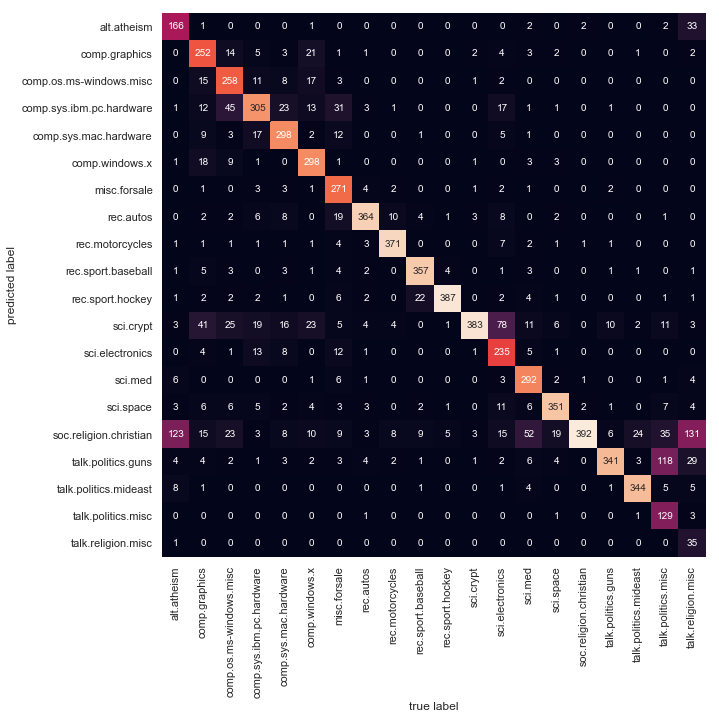

In [15]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [17]:
predict_category('sending a payload to the ISS')

'sci.space'

In [18]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [19]:
predict_category('determining the screen resolution')

'comp.graphics'